In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ay0un\anaconda3\envs\tf2.0\lib\site-packages\tensorflow\python\f

In [2]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import preprocessing

In [3]:
# Data preparation
df = pd.read_csv(r'C:/Users/ay0un/Desktop/ds-project/buenos-aires/Air-Quality-Forecast-Challenge/model_data.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.iloc[:138,:]

In [8]:
len(df)

138

In [4]:
df.columns

Index(['temp_pi_t0', 'hum_pi_t0', 'PM1_pi_t0', 'PM2.5_pi_t0', 'PM10_pi_t0',
       'wind_speed_t0', 'temp_pi_t1', 'hum_pi_t1', 'PM1_pi_t1', 'PM2.5_pi_t1',
       'PM10_pi_t1', 'wind_speed_t1', 'temp_pi_t2', 'hum_pi_t2', 'PM1_pi_t2',
       'PM2.5_pi_t2', 'PM10_pi_t2', 'wind_speed_t2', 'temp_pi_t3', 'hum_pi_t3',
       'PM1_pi_t3', 'PM2.5_pi_t3', 'PM10_pi_t3', 'wind_speed_t3', 'temp_pi_t4',
       'hum_pi_t4', 'PM1_pi_t4', 'PM2.5_pi_t4', 'PM10_pi_t4', 'wind_speed_t4',
       'temp_pi_t5', 'hum_pi_t5', 'PM1_pi_t5', 'PM2.5_pi_t5', 'PM10_pi_t5',
       'wind_speed_t5', 'PM2.5', 'PM10'],
      dtype='object')

In [5]:
labels = ['PM2.5', 'PM10']

In [6]:
X = df.drop(labels, axis=1)
y1 = df[labels[0]]
y2 = df[labels[1]]

In [9]:
len(X)

138

In [7]:
y1

0       6.641000
1       7.147500
2       8.777500
3       7.956667
4      13.833333
         ...    
133     4.190909
134     5.385000
135     3.560000
136     6.740000
137     9.065833
Name: PM2.5, Length: 138, dtype: float64

In [10]:
TRAIN_TEST_SPLIT = 0.8
n = int(TRAIN_TEST_SPLIT*df.shape[0])

In [11]:
X_train = df.iloc[:n,:]
X_test = df.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [12]:
X_train

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5
0,17.625000,30.933333,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,...,4.840833,10.010000,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561
1,11.616667,40.350000,2.710000,6.040000,9.553333,7.754637,12.683333,37.733333,4.529167,10.465000,...,4.610000,10.042500,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755
2,8.466667,49.616667,4.839167,8.685833,12.543333,7.895416,9.416667,45.208333,3.826667,7.878333,...,4.529167,10.465000,16.762500,8.496304,13.990000,35.770000,3.787000,6.641000,9.477000,8.209263
3,6.516667,61.908333,5.355000,9.979167,14.669167,5.692100,6.850000,57.158333,5.519167,9.145833,...,3.826667,7.878333,12.093333,4.104631,10.425000,42.900000,3.815000,7.147500,10.535000,6.162207
4,4.981818,66.109091,6.809091,12.583636,18.430000,4.510787,5.358333,64.891667,6.549167,12.697500,...,5.519167,9.145833,12.672500,6.151683,7.566667,53.983333,4.285000,8.777500,13.442500,6.849467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,6.250000,39.633333,1.966667,4.817500,7.861667,26.009842,7.455556,38.100000,2.594444,6.646667,...,2.857500,5.095000,7.332500,21.734581,1.681818,67.300000,3.049091,5.803636,8.612727,21.566973
106,5.420000,41.410000,2.431000,6.259000,10.376000,29.091030,5.616667,43.233333,1.573333,3.716667,...,2.594444,6.646667,11.003333,33.120000,6.940000,44.290000,2.734000,6.005000,9.448000,31.170673
107,4.445455,45.690909,2.440909,5.866364,9.520000,17.418196,4.300000,46.260000,2.158000,3.974000,...,1.573333,3.716667,5.995833,30.633865,5.309091,41.445455,2.524545,6.790909,11.402727,29.723444
108,4.360000,46.810000,1.817000,5.143000,8.756000,19.513195,4.420000,45.480000,2.235000,4.906000,...,2.158000,3.974000,5.808000,20.532627,4.454545,44.472727,2.246364,6.294545,10.689091,26.525429


In [36]:
y_true1

110    4.818182
111    8.465455
112    8.236667
113    8.873333
114    4.707500
115    5.215833
116    8.486250
117    5.630000
118    8.113333
119    8.003333
120    7.750909
121    7.355833
122    6.969167
123    5.636364
124    7.782500
125    9.465000
126    8.025000
127    6.453000
128    7.773636
129    5.475556
130    4.786250
131    5.369000
132    3.553750
133    4.190909
134    5.385000
135    3.560000
136    6.740000
137    9.065833
Name: PM2.5, dtype: float64

### PM 2.5

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
input_layer = Input(shape=(X.shape[1],))
rnn_layer = tf.keras.layers.SimpleRNN(128)
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

rnn_model = Model(inputs=input_layer, outputs=output)
rnn_model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [29]:
history = rnn_model.fit(X_train, y_train1, batch_size=1, epochs=100, verbose=1, validation_split=0)

Epoch 1/100
110/110 [==============================] - 0s 2ms/sample - loss: 37.1338 - mean_squared_error: 37.1338
Epoch 2/100
110/110 [==============================] - 0s 946us/sample - loss: 9.4010 - mean_squared_error: 9.4010
Epoch 3/100
110/110 [==============================] - 0s 1ms/sample - loss: 7.8617 - mean_squared_error: 7.8617
Epoch 4/100
110/110 [==============================] - 0s 991us/sample - loss: 7.0368 - mean_squared_error: 7.0368
Epoch 5/100
110/110 [==============================] - 0s 1ms/sample - loss: 6.4347 - mean_squared_error: 6.4347
Epoch 6/100
110/110 [==============================] - 0s 2ms/sample - loss: 6.1973 - mean_squared_error: 6.1973
Epoch 7/100
110/110 [==============================] - 0s 2ms/sample - loss: 5.2656 - mean_squared_error: 5.2656
Epoch 8/100
110/110 [==============================] - 0s 2ms/sample - loss: 4.2387 - mean_squared_error: 4.2387
Epoch 9/100
110/110 [==============================] - 0s 2ms/sample - loss: 3.6731 - mean

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = rnn_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train1,pred_train)))

pred = rnn_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_true1,pred)))

y_pred1 = pred

0.511637113722062
2.1659926863134102


In [31]:
from sklearn.metrics import mean_absolute_error
pred = rnn_model.predict(X_test)
print(mean_absolute_error(y_true1,pred))


1.716022118467961


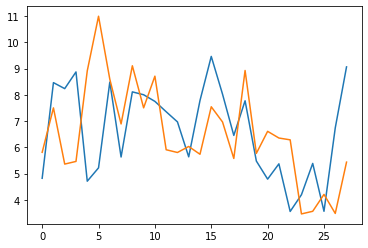

In [32]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

### PM 10

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [35]:
history2 = rnn_model.fit(X_train, y_train2, batch_size=1, epochs=100, verbose=1, validation_split=0)

Epoch 1/100
110/110 [==============================] - 0s 1ms/sample - loss: 10.5412 - mean_squared_error: 10.5412
Epoch 2/100
110/110 [==============================] - 0s 1ms/sample - loss: 4.8027 - mean_squared_error: 4.8027
Epoch 3/100
110/110 [==============================] - 0s 1ms/sample - loss: 1.6543 - mean_squared_error: 1.6543
Epoch 4/100
110/110 [==============================] - 0s 964us/sample - loss: 1.0620 - mean_squared_error: 1.0620
Epoch 5/100
110/110 [==============================] - 0s 1ms/sample - loss: 0.6406 - mean_squared_error: 0.6406
Epoch 6/100
110/110 [==============================] - 0s 1ms/sample - loss: 0.4396 - mean_squared_error: 0.4396
Epoch 7/100
110/110 [==============================] - 0s 1ms/sample - loss: 0.3525 - mean_squared_error: 0.3525
Epoch 8/100
110/110 [==============================] - 0s 1ms/sample - loss: 0.2913 - mean_squared_error: 0.2913
Epoch 9/100
110/110 [==============================] - 0s 2ms/sample - loss: 0.2369 - mean_s

In [36]:
pred_train = rnn_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train2,pred_train)))

pred = rnn_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_true2,pred)))

y_pred2 = pred

0.5305060313486194
3.2114745601697074


In [39]:
pred = rnn_model.predict(X_test)
print(mean_absolute_error(y_true1,pred))


3.440389266479239


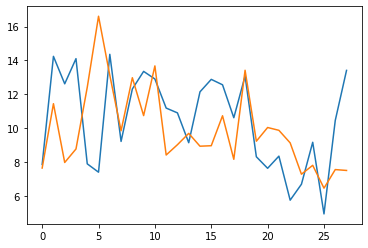

In [40]:
plt.plot(np.arange(len(y_true2)), y_true2)
plt.plot(np.arange(len(y_pred2)), y_pred2)
plt.show()